# Test usage of ocean_remap class

In [1]:
import glob
import math
import pprint

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import yaml

from ocean_remap import ocean_remap
from utils_units import conv_units

In [2]:
xr.set_options(keep_attrs=True);

## Load 2d remap matrix, list attributes, show portion of src_grid and dst_grid

In [3]:
matrix_2d_fname = 'POP_gx1v7_to_latlon_1x1_0E_mask_conserve_20220714.nc'
matrix_2d = ocean_remap(matrix_2d_fname)

In [4]:
print(matrix_2d)
print([attr for attr in dir(matrix_2d) if "__" not in attr])
print([attr for attr in dir(matrix_2d.dst_grid) if "__" not in attr])
help(matrix_2d.remap_var)

['dst_grid', 'matrix', 'remap_var', 'src_grid']
['area', 'def_dims_common', 'dims', 'frac', 'lat', 'lon', 'mask', 'write_var_CMIP_Ofx', 'write_vars_common']
Help on method remap_var in module ocean_remap:

remap_var(src_var, fill_value=1e+36) method of ocean_remap.ocean_remap instance
    Remap src_var, using matrix vector product, returning dst_var.



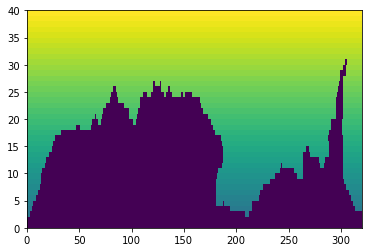

In [5]:
src_grid = matrix_2d.src_grid
plt.pcolormesh(src_grid.area.reshape(src_grid.dims)[:40,:]*src_grid.frac.reshape(src_grid.dims)[:40,:]);

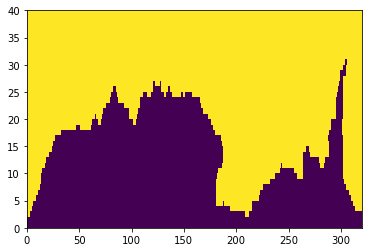

In [6]:
plt.pcolormesh(src_grid.frac.reshape(src_grid.dims)[:40,:]);

In [7]:
src_area_rad2 = (src_grid.area * src_grid.frac).reshape(src_grid.dims)
print("fraction of Earth's surface covered by src_grid")
print(src_area_rad2.sum() / (4 * math.pi))

fraction of Earth's surface covered by src_grid
0.7070232828683563


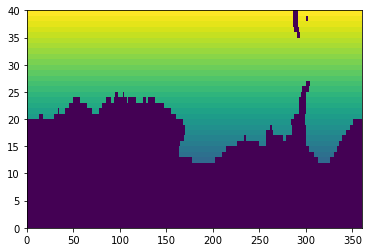

In [8]:
dst_grid = matrix_2d.dst_grid
plt.pcolormesh(dst_grid.area.reshape(dst_grid.dims)[:40,:]*dst_grid.frac.reshape(dst_grid.dims)[:40,:]);

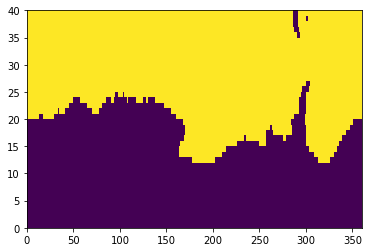

In [9]:
plt.pcolormesh(dst_grid.frac.reshape(dst_grid.dims)[:40,:]);

In [10]:
dst_area_rad2 = (dst_grid.area * dst_grid.frac).reshape(dst_grid.dims)
print("fraction of Earth's surface covered by dst_grid")
print(dst_area_rad2.sum() / (4 * math.pi))

fraction of Earth's surface covered by dst_grid
0.7070338110592923


## Load case metdata, for loading example input

In [11]:
with open("GCB_metadata.yaml", mode="r") as fptr:
    GCB_metadata = yaml.safe_load(fptr)
pprint.pprint(GCB_metadata)

{'A': {'cases': ['g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BDRD.001',
                 'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BDRD.002']},
 'B': {'cases': ['g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BCRC.001']},
 'C': {'cases': ['g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BDRC.001']},
 'D': {'cases': ['g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BCRD.001',
                 'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BCRD.002']}}


In [12]:
tseries_root = "/glade/campaign/cesm/development/bgcwg/projects/GCB_2022"

In [13]:
varname = "FG_CO2"
case = GCB_metadata["D"]["cases"][-1]
tseries_dir = f"{tseries_root}/{case}/output/ocn/proc/tseries/month_1"
path = glob.glob(f"{tseries_dir}/{case}.pop.h.{varname}.*.nc")[0]
ds = xr.open_dataset(path, chunks={"time":12})
ds

<xarray.Dataset>
Dimensions:                 (moc_comp: 3, transport_comp: 5, transport_reg: 2,
                             z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             nlat: 384, nlon: 320, time: 48, d2: 2)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                    (time) object 2018-02-01 00:00:00 ... 2022-01-01 ...
Dimensions without coordinates: moc_comp, transport_comp, transport_reg, nlat,
                                nlon, d2
Data variables: (12/55)
    moc_components          (moc_comp) |S384 dask.array<chunksize=(3,), meta=np.ndarray>
    transport_components    (transport_comp) |S384 dask.array<chunksize=(5,), meta=np.ndarray>
    transport_regions       (transport_reg) |S384 dask.array<chunksize=(2,), meta=np.ndarray>
    dz                      (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    dzw                     (z_w) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    KMT                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                      ...
    salinity_factor         float64 ...
    sflux_factor            float64 ...
    nsurface_t              float64 ...
    nsurface_u              float64 ...
    time_bound              (time, d2) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    FG_CO2                  (time, nlat, nlon) float32 dask.array<chunksize=(12, 384, 320), meta=np.ndarray>
Attributes:
    title:             g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BCRD...
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-07-07 at 06:06:59.5
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [14]:
POP_area_cm2 = xr.where(ds["KMT"]>0, ds["TAREA"], 0.0).fillna(0).values
print("fraction of Earth's surface covered by POP grid")
rearth = ds["radius"].values
POP_area_cm2.sum() / (4 * math.pi * rearth**2)

fraction of Earth's surface covered by POP grid


0.7067474712956404

## Area correction factor, to convert flux from per model area to per src_grid area

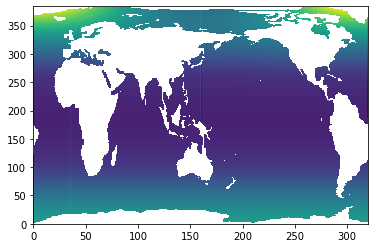

In [15]:
mdl2src = POP_area_cm2 / rearth**2 / src_area_rad2
plt.pcolormesh(mdl2src)

## Read and plot field

In [16]:
da = ds["FG_CO2"]
fill_value = da.encoding["_FillValue"]
slice_POP = da.to_masked_array()

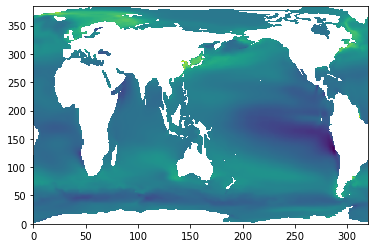

In [17]:
time_mean = slice_POP.mean(axis=0)
plt.pcolormesh(slice_POP.mean(axis=0));

## Remap flux field, check conservation

In [18]:
integral_gn_POP = (slice_POP * POP_area_cm2).sum(axis=(1, 2))
integral_gn_POP

masked_array(data=[1975971886164611.5, 410561796926940.5,
                   51342723326905.25, 767831496849342.5,
                   1524755380521593.2, 1508852126830044.5,
                   524818384049186.9, 78623643492509.34,
                   615603309879720.4, 1792039295772059.5,
                   2975121261214279.0, 3071758224677058.5,
                   1910380777381018.2, 505118954087803.1,
                   -650980702954377.6, 286714199208746.2,
                   1592978808130875.2, 1129732110802519.8,
                   352584674538147.1, -318048251914436.9,
                   330485535267320.6, 2013447916210437.5,
                   3618401100808596.0, 4115668668454563.5,
                   1983342541061557.0, 408460734683015.25,
                   -5821817955022.375, 756302298733355.0,
                   1688003496001706.0, 1431823957666279.0,
                   401218919107565.5, -295146156379941.6,
                   13576976222017.125, 1526354852486474.5,
         

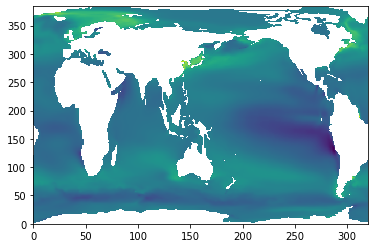

In [19]:
slice_src = slice_POP * mdl2src
time_mean = slice_src.mean(axis=0)
plt.pcolormesh(time_mean);

In [20]:
integral_gn = (slice_src * src_area_rad2 * rearth**2).sum(axis=(1, 2))
integral_gn / integral_gn_POP

masked_array(data=[1.0000000000000002, 1.0, 0.9999999999999988, 1.0, 1.0,
                   1.0, 1.0, 1.0000000000000009, 1.0000000000000002, 1.0,
                   1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0,
                   1.0000000000000002, 1.0, 1.0000000000000004,
                   1.0000000000000009, 1.0, 1.0, 1.0, 1.0000000000000002,
                   1.0, 0.9999999999999999, 0.9999999999998926,
                   0.9999999999999997, 1.0, 1.0, 1.0000000000000007, 1.0,
                   1.0, 1.0, 1.0, 1.0000000000000002, 1.0000000000000002,
                   1.0, 1.0, 1.0, 1.0, 0.9999999999999997,
                   1.0000000000000047, 1.0000000000000007,
                   1.0000000000000018, 1.0, 0.9999999999999998, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False,

In [21]:
slice_dst = matrix_2d.remap_var(slice_src, fill_value=fill_value)

masked_array(data=[1.0009813550077693, 1.014630048370016,
                   1.1458616574596348, 1.0086648509070646,
                   1.0010524471521962, 0.9998842263745391,
                   0.9958402044625614, 0.9350559188401395,
                   0.9908748378983911, 0.9939778272452535,
                   0.9972060771272294, 0.9978996784679365,
                   1.0001920818808598, 1.0166331845968546,
                   0.99014235580935, 1.0177618564528008,
                   0.9999544978100363, 0.9981684553084563,
                   0.9942839988779838, 1.012110989795358,
                   0.978856052771367, 0.9950057929602765,
                   0.9969573773726952, 0.9993707381187453,
                   1.0018367409826638, 1.0161761269546186,
                   -0.6760329500802356, 1.0050692151758336,
                   1.0001427084514682, 0.9978306760245294,
                   0.9934240694954849, 1.0218453672461378,
                   0.4670068863542385, 0.9931563181571876,
 

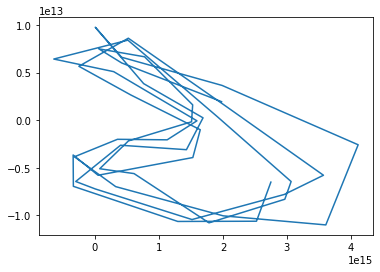

In [22]:
dst_area_cm2 = rearth**2 * dst_area_rad2
integral_gr = (slice_dst * dst_area_cm2).sum(axis=(1, 2))
plt.plot(integral_gr, integral_gr-integral_gn)
integral_gr / integral_gn

## Apply dst_grid mask

In [23]:
slice_dst = np.where(slice_dst != fill_value, slice_dst, np.nan)

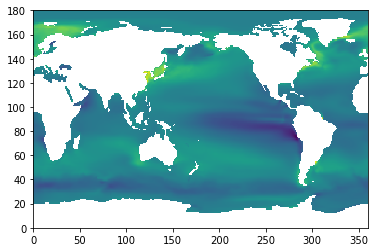

In [24]:
time_mean = slice_dst.mean(axis=0)
plt.pcolormesh(time_mean);

## Write remapped field to netCDF file

In [25]:
def add_grid_vars(dst_ds, ds_in):
    dst_ds["area"] = xr.DataArray(
        (conv_units(ds_in["radius"], "m")**2).values * dst_grid.area.reshape(dst_grid.dims),
        coords={"lat": dst_grid.lat, "lon": dst_grid.lon},
        attrs={"long_name": "grid cell area", "units": "m2"},
    )
    dst_ds["area"].encoding["zlib"] = True
    dst_ds["area"].encoding["complevel"] = 1

    dst_ds["mask_sfc"] = xr.DataArray(
        dst_grid.mask.reshape(dst_grid.dims),
        coords={"lat": dst_grid.lat, "lon": dst_grid.lon},
        attrs={"long_name": "surface grid cell mask", "units": "1"},
    )
    dst_ds["mask_sfc"].encoding["zlib"] = True
    dst_ds["mask_sfc"].encoding["complevel"] = 1


In [26]:
dst_da = xr.DataArray(
    slice_dst,
    coords={"time": ds["time"], "lat": dst_grid.lat, "lon": dst_grid.lon},
    attrs=da.attrs,
)
del dst_da.attrs["grid_loc"]
dst_da.encoding = da.encoding
del dst_da.encoding["coordinates"]
tb_name = ds["time"].attrs["bounds"]
dst_ds = xr.Dataset(
    {"time": ds["time"], tb_name: ds[tb_name], da.name: dst_da}
)
dst_ds
dst_ds.encoding = ds.encoding

add_grid_vars(dst_ds, ds)

dst_ds["lat"].attrs = {"long_name": "latitude", "units": "degrees_north"}
dst_ds["lon"].attrs = {"long_name": "longitude", "units": "degrees_east"}

# ensure NaN _FillValues do not get generated
for d in [dst_ds.variables, dst_ds.coords]:
    for var in d:
        if "_FillValue" not in dst_ds[var].encoding:
            dst_ds[var].encoding["_FillValue"] = None

dst_ds.to_netcdf("remap_2d_test.nc")